# Glycolysis/Gluconeogenesis Subsystem

Set the model environment

In [1]:
import cobra.test
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
from cobra.sampling import sample
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)
model = cobra.io.load_json_model('./e_coli_core.json') # Model must be in the same directory

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


### Glycolysis

Glycolysis is the metabolic pathway in the *E.coli* core model that converts glucose and fructose into pyruvate. The free energy released in this process is used to form the high-energy compounds of atp_c]and nadh_c. The location of the glycolysis pathway on the *E.coli* core map is highlighted in the figure below.

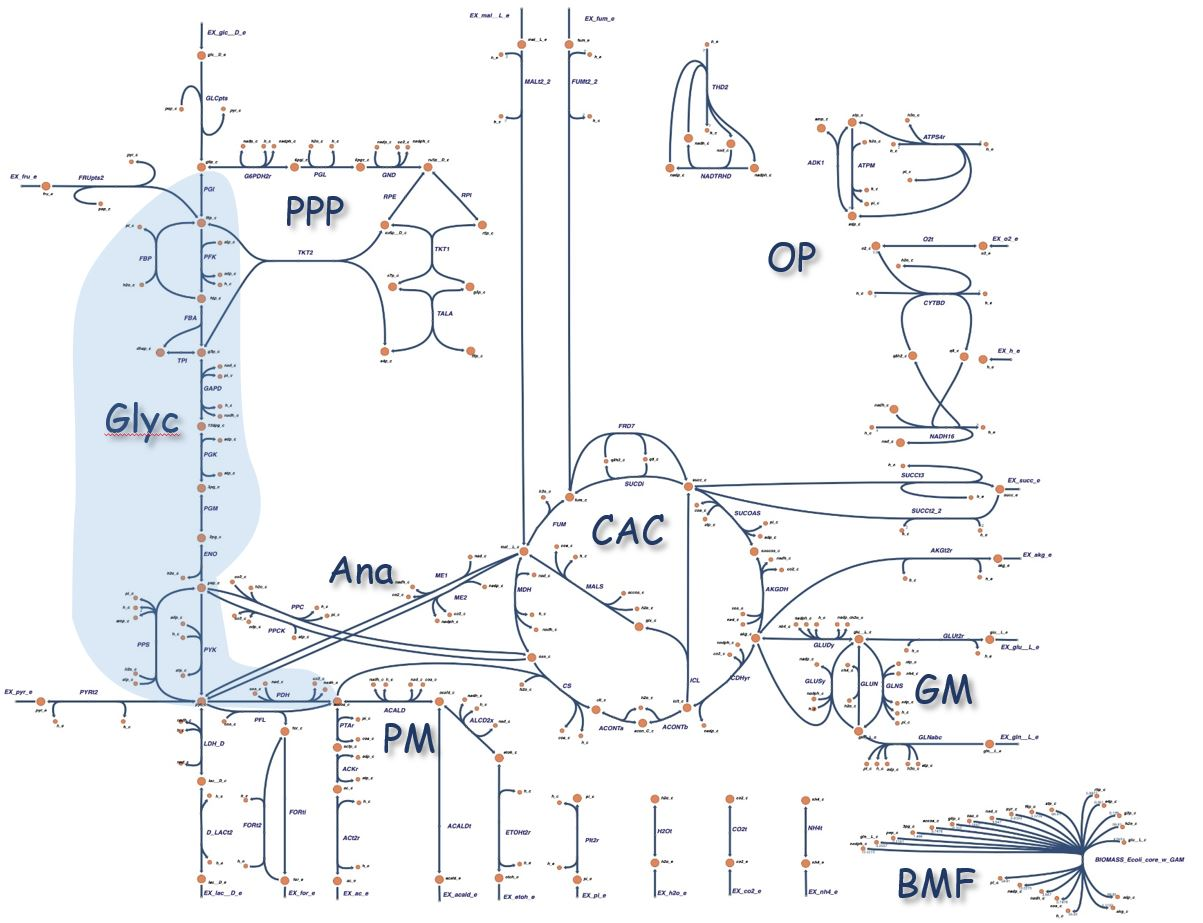

                    Figure 1. The location of the glycolysis subsystem on the E.coli core map.

A table showing the reactions associated with the glycolysis pathway can be extracted from the core model as follows:

In [2]:
# Create a table of all the reactions and their associated subsystems
reaction_names = [r.name for r in model.reactions]
reaction_ids = [r.id for r in model.reactions]
reaction_formula = [r.reaction for r in model.reactions]
reaction_subsystem = [r.subsystem for r in model.reactions]
reactionList = {'Reaction ID': reaction_ids,
                'Reaction Name': reaction_names,
                'Reaction Formula': reaction_formula,
                'Reaction Subsystem': reaction_subsystem,
               }

df = pd.DataFrame(reactionList, columns= ['Reaction ID','Reaction Name','Reaction Formula','Reaction Subsystem'])
# Select the reactions associated with the desired subsystem
SSindex = []
for i in range(len(reaction_subsystem)):
    if reaction_subsystem[i] == 'Glycolysis/Gluconeogenesis':
        SSindex.append(i)
df.loc[SSindex]

,Reaction ID,Reaction Name,Reaction Formula,Reaction Subsystem
0,PFK,Phosphofructokinase,atp_c + f6p_c --> adp_c + fdp_c + h_c,Glycolysis/Gluconeogenesis
2,PGI,Glucose-6-phosphate isomerase,g6p_c <=> f6p_c,Glycolysis/Gluconeogenesis
3,PGK,Phosphoglycerate kinase,3pg_c + atp_c <=> 13dpg_c + adp_c,Glycolysis/Gluconeogenesis
7,PGM,Phosphoglycerate mutase,2pg_c <=> 3pg_c,Glycolysis/Gluconeogenesis
18,PPS,Phosphoenolpyruvate synthase,atp_c + h2o_c + pyr_c --> amp_c + 2.0 h_c + pep_c + pi_c,Glycolysis/Gluconeogenesis
23,PYK,Pyruvate kinase,adp_c + h_c + pep_c --> atp_c + pyr_c,Glycolysis/Gluconeogenesis
33,ENO,Enolase,2pg_c <=> h2o_c + pep_c,Glycolysis/Gluconeogenesis
42,TPI,Triose-phosphate isomerase,dhap_c <=> g3p_c,Glycolysis/Gluconeogenesis
63,FBA,Fructose-bisphosphate aldolase,fdp_c <=> dhap_c + g3p_c,Glycolysis/Gluconeogenesis
64,FBP,Fructose-bisphosphatase,fdp_c + h2o_c --> f6p_c + pi_c,Glycolysis/Gluconeogenesis


It should be pointed out that although the reaction pyrvate dehydrogenase (PDH) is included in the glycolysis subsystem it is functionally a better fit in the "Glycoxylate Cycle, Gluconeogenesis, and Anapleurotic Reactions" subsystem.  

In addition to providing some atp_c through substrate phosphorylation (PGK and PYK), the glycolysis pathway also proves a major source of nadh_c (GAPD) that is used to power the electron transport chain. It also supplies several key precursors needed for the biosynthesis pathways. These precursors include: D-Glucose 6-phosphate (g6p_c) a precursor for sugar nucleotides, D-Fructose 6-phosphate (f6p_c) a precursor for amino sugars, glyceraldehyde 3-phosphate (g3p_c) a precursor for phospholipids, 3-Phospho-D-glycerate (3pg_c) a precursor for cysteine, glycine, and serine, phosphoenolpyruvate (pep_c) a precursor for tyrosine, tryptophan and phenylalanine, and finally pyruvate (pyr_c) the precursor for alanine, leucine, and valine[5]. These precursors and their location on the glycolysis pathway are illustrated in Figure 2.

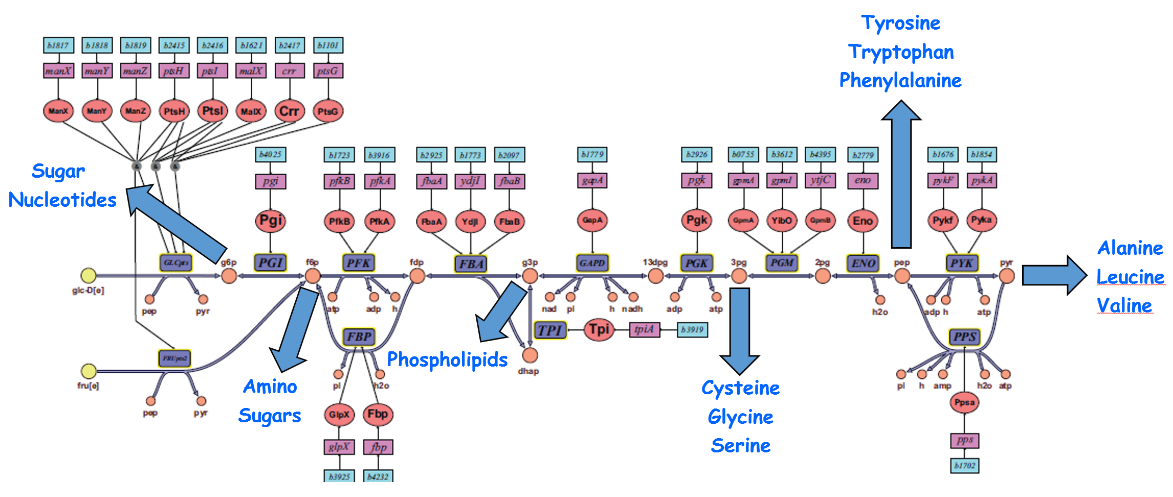

                    Figure 2. Precursors produced in the glycolysis pathway [1]. 

Visualizing the flux though the glycolysis pathways can be seen by using the draw package available with COBRApy Toolbox. This is illustrated in the code listed below for the case of anaerobic operation with fructose as the carbon source.

In [3]:
model = cobra.io.load_json_model('./e_coli_core.json')
# Set the inputs
model.reactions.EX_o2_e.lower_bound = -0
model.reactions.EX_glc__D_e.lower_bound = -0
model.reactions.EX_fru_e.lower_bound = -10
# Optimize
solution = model.optimize()
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,0.3782,1,0.63%
fru_e,EX_fru_e,10,6,99.37%
h2o_e,EX_h2o_e,7.116,0,0.00%
nh4_e,EX_nh4_e,1.154,0,0.00%
pi_e,EX_pi_e,0.7786,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-8.504,2,33.11%
etoh_e,EX_etoh_e,-8.279,2,32.23%
for_e,EX_for_e,-17.8,1,34.66%
h_e,EX_h_e,-30.55,0,0.00%


An Escher map of this simulation is shown below

In [4]:
builder = Builder(
    map_name='e_coli_core.Core metabolism', 
    model_name='e_coli_core', 
)
builder

Builder()

In [5]:
builder.reaction_data = solution.fluxes

Note that the fructose enters the network on the top left of the map. The detailed non-zero flux values for all the active reactions are shown below.

In [6]:
nz = solution.fluxes
nz = nz.replace(0, np.nan)
nz = nz.dropna(how='all', axis=0)
nz

PFK                          9.789459
PFL                         17.804674
PGI                         -0.043391
PGK                        -19.437336
ACALD                       -8.279455
PGM                        -19.120689
PIt2r                        0.778644
ALCD2x                      -8.279455
ACKr                        -8.503585
PPC                          0.606541
ACONTa                       0.228363
ACONTb                       0.228363
ATPM                         8.390000
ACt2r                       -8.503585
ATPS4r                      -5.452053
PTAr                         8.503585
PYK                          8.404273
BIOMASS_Ecoli_core_w_GAM     0.211663
CO2t                         0.378178
RPE                         -0.152143
CS                           0.228363
RPI                         -0.152143
ENO                         19.120689
ETOHt2r                     -8.279455
TALA                        -0.037867
THD2                         3.629194
TKT1        

In [7]:
nz[1]

17.804674217935307

The consumers of precursors formed in the glycolysis pathways can be found using the COBRApy Toolbox function. An example looking for both the producers and consumers of "f6p_c," a precursor for amino sugars is shown below. 

In [8]:
model.metabolites.f6p_c.summary()

Percent,Flux,Reaction,Definition
100.00%,10,FRUpts2,fru_e + pep_c --> f6p_c + pyr_c
Percent,Flux,Reaction,Definition
0.15%,-0.01501,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
97.89%,-9.789,PFK,atp_c + f6p_c --> adp_c + fdp_c + h_c
0.43%,-0.04339,PGI,g6p_c <=> f6p_c
0.38%,-0.03787,TALA,g3p_c + s7p_c <=> e4p_c + f6p_c
1.14%,-0.1143,TKT2,e4p_c + xu5p__D_c <=> f6p_c + g3p_c


Note that the majority of the f6p_c flux is directed down the glycolysis pathway (PFK), a modest amount is directed to the pentose phosphate pathway (PGI, TALA, TKT2), with a small amount directed to the biomass function (0.015) which represents the biosynthesis load of the precursors. A similar approach can be used to understand the producer/consumer relationships with the other glycolytic precursors. 

It is possible to create a table of reactions and their flux values for both glycolysis supported carbon sources, glucose and fructose. This is illustrated below. 

In [9]:
# Load model
model = cobra.io.load_json_model('./e_coli_core.json')

# Set aerobic conditions
model.reactions.EX_o2_e.lower_bound = -1000

# Set conditions for glucose carbon source in aerobic environment
model.reactions.EX_glc__D_e.lower_bound = -10
Glucose_aerobic_flux = model.optimize()

# Set conditions for fructose carbon source in aerobic environment
model.reactions.EX_glc__D_e.lower_bound = -0
model.reactions.EX_fru_e.lower_bound = -10
Frucose_aerobic_flux = model.optimize()

# Set anaerobic conditions
model.reactions.EX_o2_e.lower_bound = -0

# Set conditions for glucose carbon source in anaerobic environment
model.reactions.EX_glc__D_e.lower_bound = -10
model.reactions.EX_fru_e.lower_bound = -0
Glucose_anaerobic_flux = model.optimize()

# Set conditions for fructose carbon source in anaerobic environment
model.reactions.EX_glc__D_e.lower_bound = -0
model.reactions.EX_fru_e.lower_bound = -10
Frucose_anaerobic_flux = model.optimize()

# Rearranging the reactions to follow the flux direction of glycolysis
# Reaction order: PGI, PFK, FBP, FBA, TPI, GAPD, PGK, PGM, ENO, PYK, PPS, PDH
Gindex = [2,0,64,63,42,72,3,7,33,23,18,94]

# Create a table of all the reactions and their associated subsystems
reactionList = {'Glucose Aerobic Flux': Glucose_aerobic_flux[Gindex],
                'Frucose Aerobic Flux': Frucose_aerobic_flux[Gindex],
                'Glucose Anaerobic Flux': Glucose_anaerobic_flux[Gindex],
                'Frucose Anaerobic Flux': Frucose_anaerobic_flux[Gindex],
               }

Glycolysis_table = pd.DataFrame(reactionList, columns= ['Glucose Aerobic Flux','Frucose Aerobic Flux',
                                                        'Glucose Anaerobic Flux','Frucose Anaerobic Flux'])
Glycolysis_table.round(4)

,Glucose Aerobic Flux,Frucose Aerobic Flux,Glucose Anaerobic Flux,Frucose Anaerobic Flux
PGI,4.8609,-5.1391,9.9566,-0.0434
PFK,7.4774,7.4774,9.7895,9.7895
FBP,0.0000,0.0000,0.0000,0.0000
FBA,7.4774,7.4774,9.7895,9.7895
TPI,7.4774,7.4774,9.7895,9.7895
GAPD,16.0235,16.0235,19.4373,19.4373
PGK,-16.0235,-16.0235,-19.4373,-19.4373
PGM,-14.7161,-14.7161,-19.1207,-19.1207
ENO,14.7161,14.7161,19.1207,19.1207
PYK,1.7582,1.7582,8.4043,8.4043


From this table, it can be seen that in all four situations, the flux flows from the carbon source at the top left of the metabolic maps down the glycolysis pathway to form pyruvate in the lower right. In aerobic conditions, part of the flux is diverted to the G6PDH2r entrance to the pentose phosphate pathways. For the anaerobic case, the flux is only diverted to the lower half of the pentose phosphate pathway (TKT2) to produce the pentose phosphate pathway precursors. Also note that the flux through GAPD has almost doubled since the number of g3p_c metabolites leaving the FBA and TPI reaction are double the number of fdp_c metabolites entering FBA. This is possible since the output of FBA provides both a molecule of g3p_c and a molecule of dhap_c. The dhap_c is rapidly converted to g3p_c thus creating the effect of doubling the g3p_c entering GAPD. To see this let's look at the producers of the metabolite g3p_c.

In [10]:
model.metabolites.get_by_id('g3p_c').summary()

Percent,Flux,Reaction,Definition
49.90%,9.789,FBA,fdp_c <=> dhap_c + g3p_c
0.19%,0.03787,TALA,g3p_c + s7p_c <=> e4p_c + f6p_c
49.90%,9.789,TPI,dhap_c <=> g3p_c
Percent,Flux,Reaction,Definition
0.14%,-0.0273,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
99.09%,-19.44,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.19%,-0.03787,TKT1,r5p_c + xu5p__D_c <=> g3p_c + s7p_c
0.58%,-0.1143,TKT2,e4p_c + xu5p__D_c <=> f6p_c + g3p_c


Under the producing reactions we see that both FBA and TPI provide 9.789 mmol/gDW-hr of flux to g3p_c which is consumed by GAPD as discussed above.

### Gluconeogenesis

The gluconeogenic reactions are necessary to allow *E. coli* to grow on 3-carbon (pyruvate) and 4-carbon compounds (malate, fumarate, and succinate). This requires reversing the carbon flux through glycolysis (gluconeogenesis) to produce essential precursors for biosynthesis. First let's look at an Escher for the aerobic operation with malate as the carbon source.

In [11]:
model2 = cobra.io.load_json_model('./e_coli_core.json')
# Set the inputs
model2.reactions.EX_o2_e.lower_bound = -1000
model2.reactions.EX_glc__D_e.lower_bound = -0
model2.reactions.EX_mal__L_e.lower_bound = -10
# Optimize
solution2 = model2.optimize()
model2.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
h_e,EX_h_e,12.56,0,0.00%
mal__L_e,EX_mal__L_e,10,4,100.00%
nh4_e,EX_nh4_e,2.022,0,0.00%
o2_e,EX_o2_e,13.79,0,0.00%
pi_e,EX_pi_e,1.364,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-24.22,1,100.00%
h2o_e,EX_h2o_e,-16.92,0,0.00%


In [12]:
builder2 = Builder(
    map_name='e_coli_core.Core metabolism', 
    model_name='e_coli_core', 
)
builder2

Builder()

In [13]:
builder2.reaction_data = solution2.fluxes

Looking at this map you can see that all the active Glycolysis/Gluconeogenesis Subsystem reactions are moving in the opposite direction as glycolysis. A table showing these flux values for pyruvate, malate, fumarate, and succinate can be constructed as follows.

In [14]:
# Load model
model3 = cobra.io.load_json_model('./e_coli_core.json')

# Set aerobic conditions
model3.reactions.EX_o2_e.lower_bound = -1000

# Set conditions for glucose carbon source in aerobic environment
model3.reactions.EX_glc__D_e.lower_bound = -0
model3.reactions.EX_pyr_e.lower_bound = -10
Pyruvate_flux = model3.optimize()

# Set conditions for fructose carbon source in aerobic environment
model3.reactions.EX_pyr_e.lower_bound = -0
model3.reactions.EX_mal__L_e.lower_bound = -10
Malate_flux = model3.optimize()

# Set conditions for glucose carbon source in anaerobic environment
model3.reactions.EX_mal__L_e.lower_bound = -0
model3.reactions.EX_fum_e.lower_bound = -10
Fumarate_flux = model3.optimize()

# Set conditions for fructose carbon source in anaerobic environment
model3.reactions.EX_fum_e.lower_bound = -0
model3.reactions.EX_succ_e.lower_bound = -10
Succinate_flux = model3.optimize()

# Rearranging the reactions to follow the flux direction of glycolysis
# Reaction order: PGI, PFK, FBP, FBA, TPI, GAPD, PGK, PGM, ENO, PYK, PPS, PDH
Gindex = [2,0,64,63,42,72,3,7,33,23,18,94]

# Create a table of all the reactions and their associated subsystems
reactionList = {'Pyruvate Flux': Pyruvate_flux[Gindex],
                'Malate Flux': Malate_flux[Gindex],
                'Fumarate Flux': Fumarate_flux[Gindex],
                'Succinate Flux': Succinate_flux[Gindex],
               }

Gluconeogenesis_table = pd.DataFrame(reactionList, columns= ['Pyruvate Flux','Malate Flux',
                                                        'Fumarate Flux','Succinate Flux'])
Gluconeogenesis_table.round(4)

,Pyruvate Flux,Malate Flux,Fumarate Flux,Succinate Flux
PGI,-0.0597,-0.0760,-0.0760,-0.0815
PFK,0.0000,0.0000,0.0000,0.0000
FBP,0.2897,0.3688,0.3688,0.3955
FBA,-0.2897,-0.3688,-0.3688,-0.3955
TPI,-0.2897,-0.3688,-0.3688,-0.3955
GAPD,-0.7742,-0.9855,-0.9855,-1.0568
PGK,0.7742,0.9855,0.9855,1.0568
PGM,1.2098,1.5402,1.5402,1.6516
ENO,-1.2098,-1.5402,-1.5402,-1.6516
PYK,0.0000,0.0000,0.0000,0.0000


As a simple example, let's look at the producing and consuming reactions with the metabolite pep_c which connects the anapleurotic reactions to the Glycolysis/Gluconeogenesis pathway.

In [15]:
model3.metabolites.pep_c.summary()

Percent,Flux,Reaction,Definition
100.00%,1.858,PPCK,atp_c + oaa_c --> adp_c + co2_c + pep_c
Percent,Flux,Reaction,Definition
11.11%,-0.2064,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
88.89%,-1.652,ENO,2pg_c <=> h2o_c + pep_c


Note that PPCK, an anapleurotic reaction, feeds flux into ENO a reaction in the Glycolysis/Gluconeogenesis pathway.

# References

1. Orth, Fleming, and Palsson (2010), EcoSal Chapter 10.2.1 - Reconstruction and Use of Microbial Metabolic Networks: the Core Escherichia coli Metabolic Model as an Educational Guide  